### Color Threshold, Blue Screen

#### Import resources

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

#### Read in and display the image

In [2]:
# Read in the image
image = cv2.imread('images/pizza_bluescreen.jpg')

# Print out the type of image data and its dimensions(height, width, color)
print('This image is:', type(image),
      ' with dimensions:', image.shape)

This image is: <class 'numpy.ndarray'>  with dimensions: (514, 816, 3)


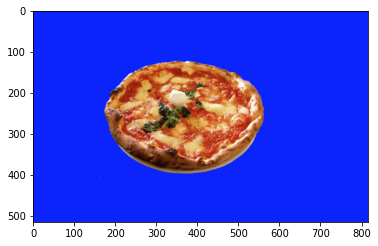

In [16]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB(from BGR)
# image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
image_copy = image_copy[..., ::-1] # [start: stop: step]

# Display the image copy
plt.imshow(image_copy)

In [18]:
# TODO: Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background
lower_blue = np.array([0, 0, 220])
upper_blue = np.array([250, 250, 255])

#### Create a mask

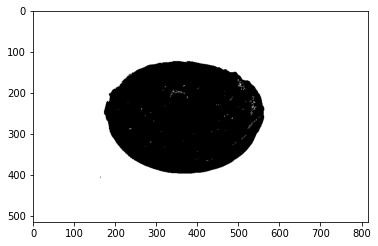

In [19]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

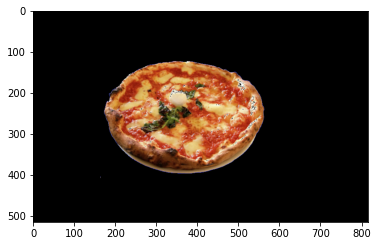

In [23]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]

# Display
plt.imshow(masked_image)

#### Mask and add a background image

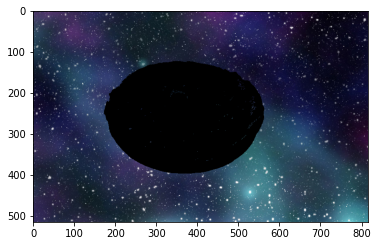

In [22]:
# Load in a backgroud image, and convert it to RGB
backgroud_image = cv2.imread('images/space_background.jpg')
backgroud_image = backgroud_image[..., ::-1]

# Crop it to the right size (514, 816)
crop_background = backgroud_image[:514, :816]

# Mask the cropped background so that pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

#### Create a complete image

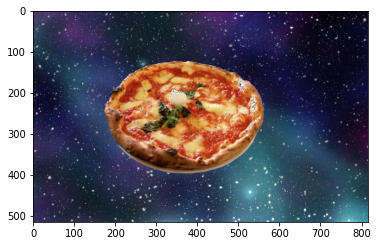

In [24]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display
plt.imshow(complete_image)